# Librerías.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
#from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
plt.style.use('ggplot')

# py -m pip install xlrd
# py -m pip install plotly

# Lectura base de datos.

In [6]:
glaciar  = pd.read_excel("Glaciar.xls",usecols=range(4,10)) # El usecols es para seleccionar las columnas que nos interesan.
lagos = pd.read_excel("Lagos.xls",usecols=range(4,10))
nubes = pd.read_excel("Nubes.xls",usecols=range(4,10))
sombra = pd.read_excel("Sombra.xls",usecols=range(4,10))
suelos = pd.read_excel("Suelos.xls",usecols=range(4,10))
veget = pd.read_excel("Vegetación.xls",usecols=range(4,10))


## Análisis

In [7]:
print("Tamaños de la base glaciar:",glaciar.shape)
print("Tamaños de la base lagos:", lagos.shape)
print("Tamaños de la base nubes:", nubes.shape)
print("Tamaños de la base sombra:", sombra.shape)
print("Tamaños de la base suelos:", suelos.shape)
print("Tamaños de la base vegetacion:", veget.shape)

Tamaños de la base glaciar: (2513, 6)
Tamaños de la base lagos: (623, 6)
Tamaños de la base nubes: (3309, 6)
Tamaños de la base sombra: (415, 6)
Tamaños de la base suelos: (2151, 6)
Tamaños de la base vegetacion: (5019, 6)


Se puede notar que la base de datos de **Vegetación** es la que tiene mayor tamaño con 5019 datos.

En el siguiente código lo que se hará es crear una nueva columna con la categoría a la cual pertenece la base de datos para luego unir todas las bases de datos.

In [8]:
categoria_glaciar = pd.DataFrame(np.repeat("glaciar",len(glaciar)),columns=['categoria'])
glaciar = pd.concat([glaciar,categoria_glaciar],axis=1,)

categoria_lagos = pd.DataFrame(np.repeat("lagos",len(lagos)),columns=['categoria'])
lagos = pd.concat([lagos,categoria_lagos],axis=1,)

categoria_nubes = pd.DataFrame(np.repeat("nubes",len(nubes)),columns=['categoria'])
nubes = pd.concat([nubes,categoria_nubes],axis=1,)

categoria_sombra = pd.DataFrame(np.repeat("sombra",len(sombra)),columns=['categoria'])
sombra = pd.concat([sombra,categoria_sombra],axis=1,)

categoria_suelos = pd.DataFrame(np.repeat("suelos",len(suelos)),columns=['categoria'])
suelos = pd.concat([suelos,categoria_suelos],axis=1,)

categoria_veget = pd.DataFrame(np.repeat("vegetacion",len(veget)),columns=['categoria'])
veget = pd.concat([veget,categoria_veget],axis=1,)

In [9]:
datos_juntos = pd.concat([glaciar,lagos,nubes,sombra,suelos,veget],axis=0) # Uniendo todos los datos.
datos_juntos = datos_juntos.reset_index(drop=True) # Reiniciando indices
datos_juntos

,NDVI,NDSI,NDGI,NDSII,NWI,DEM_5,categoria
0,-0.044926,0.199722,0.002851,0.047771,-0.413084,4991,glaciar
1,-0.013605,0.204905,0.002855,0.016459,-0.398383,5007,glaciar
2,0.024920,0.006929,0.014650,-0.010274,-0.632121,5043,glaciar
3,0.048461,0.019522,0.002240,-0.046226,-0.562921,5055,glaciar
4,-0.031398,0.201222,-0.025102,0.006302,-0.406262,4987,glaciar
...,...,...,...,...,...,...,...
14025,0.301759,-0.091220,0.014150,-0.288842,-0.631418,2764,vegetacion
14026,0.303991,-0.092158,0.012830,-0.292301,-0.633051,2783,vegetacion
14027,0.313515,-0.098693,0.016565,-0.298500,-0.638920,2797,vegetacion
14028,0.303921,-0.103209,0.012703,-0.292347,-0.638347,2807,vegetacion


# Análisis descriptivo de la base de datos.

In [6]:
datos_juntos.categoria.value_counts()

vegetacion    5019
nubes         3309
glaciar       2513
suelos        2151
lagos          623
sombra         415
Name: categoria, dtype: int64

In [7]:
correlacion = datos_juntos.corr()

In [8]:
correlacion

,NDVI,NDSI,NDGI,NDSII,NWI,DEM_5
NDVI,1.000000,-0.699249,0.560656,-0.995148,-0.763960,-0.861897
NDSI,-0.699249,1.000000,0.113652,0.755735,0.991171,0.631863
NDGI,0.560656,0.113652,1.000000,-0.476501,0.033645,-0.517664
NDSII,-0.995148,0.755735,-0.476501,1.000000,0.815003,0.853115
NWI,-0.763960,0.991171,0.033645,0.815003,1.000000,0.655290
DEM_5,-0.861897,0.631863,-0.517664,0.853115,0.655290,1.000000


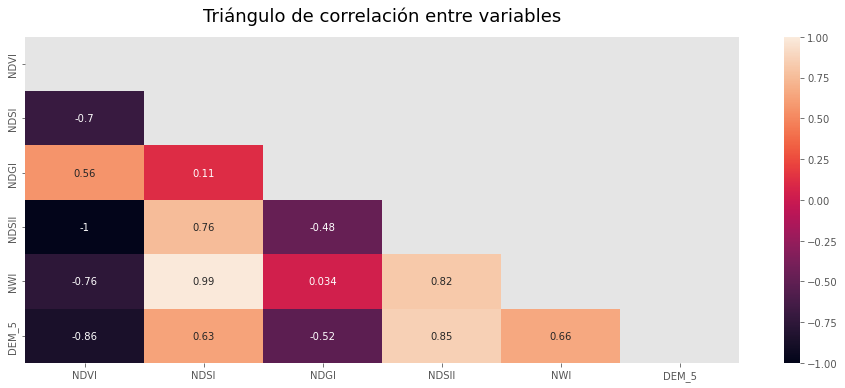

In [106]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(datos_juntos.corr()))
heatmap = sns.heatmap(datos_juntos.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triángulo de correlación entre variables', fontdict={'fontsize':18}, pad=16);

In [8]:
datos_juntos.describe()

,NDVI,NDSI,NDGI,NDSII,NWI,DEM_5
count,14030.000000,14030.000000,14030.000000,14030.000000,14030.000000,14030.000000
mean,0.118606,0.041910,0.002462,-0.116887,-0.507704,3459.633072
std,0.162140,0.270941,0.018646,0.153436,0.184958,1229.593613
min,-0.124480,-0.275673,-0.070469,-0.422731,-0.706731,1612.000000
25%,0.009923,-0.140766,-0.008701,-0.287505,-0.646283,2284.000000
50%,0.040696,-0.096875,0.005370,-0.067308,-0.616048,3221.000000
75%,0.302899,0.091304,0.016999,-0.013224,-0.434973,4729.000000
max,0.446586,0.696244,0.059032,0.147263,-0.074401,5609.000000


Estandarizamos los datos para hacer boxplot

In [75]:
sd = datos_juntos.iloc[:,0:6]

scaler = StandardScaler()

standardized_data = scaler.fit_transform(sd)
standardized_df = pd.DataFrame(standardized_data, columns=sd.columns)


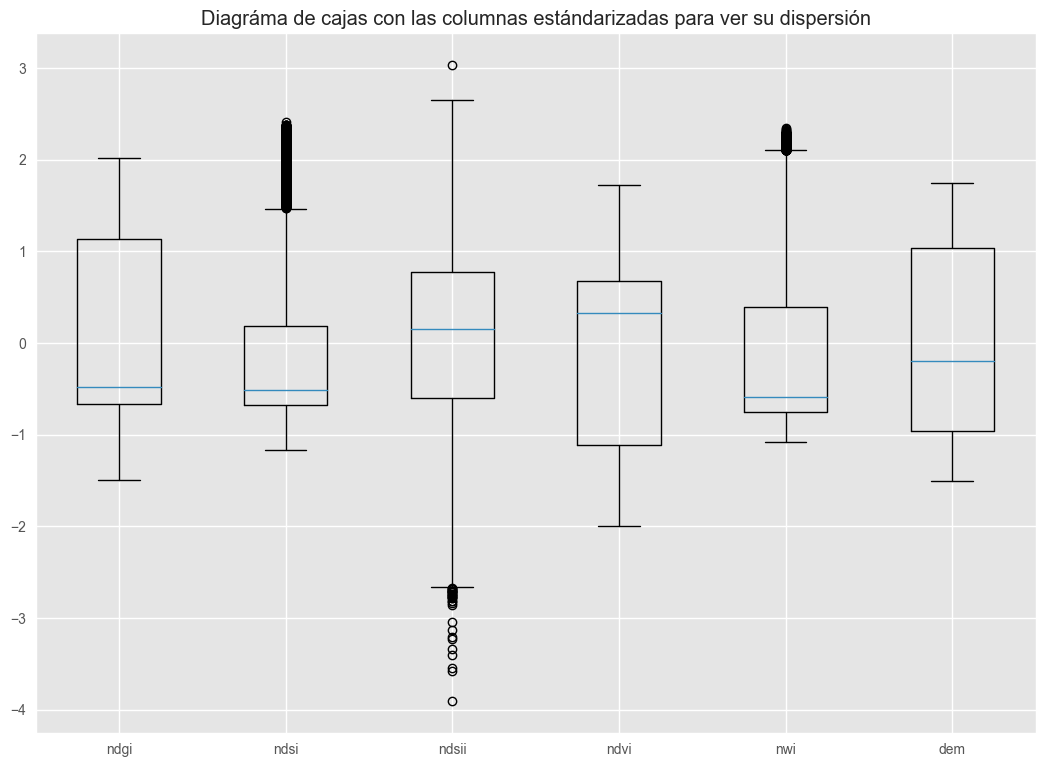

In [11]:
fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(standardized_df)
ax.set_xticklabels(['ndgi', 'ndsi',
                    'ndsii', 'ndvi', 'nwi','dem']) 

plt.title("Diagráma de cajas con las columnas estándarizadas para ver su dispersión")
plt.show()

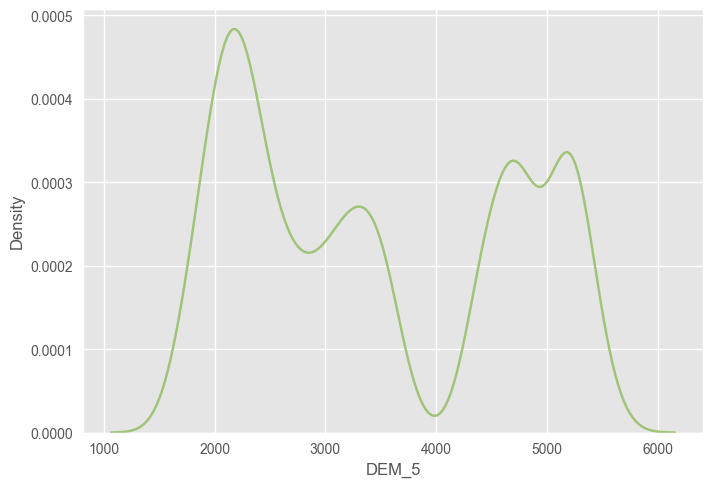

In [12]:
sns.distplot(datos_juntos['DEM_5'],color='g',hist=False);

En este último gráfico se puede observar que hay muy pocos DEM en 1000,4000,6000.

# KNN.


In [10]:
X = datos_juntos.drop(["categoria"],axis=1)
y = datos_juntos["categoria"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [11]:
X_train

,NDVI,NDSI,NDGI,NDSII,NWI,DEM_5
837,-0.086808,0.647084,0.012552,0.099252,-0.107236,5232
12035,0.333333,-0.135948,0.021483,-0.314100,-0.653046,2158
7136,0.045565,-0.164967,-0.029137,-0.074603,-0.641527,4581
1621,-0.084975,0.628706,0.012954,0.097821,-0.121327,5213
3720,0.027373,0.060668,-0.008586,-0.035951,-0.460555,2971
...,...,...,...,...,...,...
905,-0.089920,0.651882,0.013335,0.103132,-0.103325,5232
5192,0.004719,0.141247,-0.008522,-0.013240,-0.398865,3284
12172,0.345178,-0.167694,0.025540,-0.322481,-0.669528,2213
235,-0.085728,0.625098,0.014179,0.099785,-0.125572,5086


In [12]:
y_train

837         glaciar
12035    vegetacion
7136         suelos
1621        glaciar
3720          nubes
            ...    
905         glaciar
5192          nubes
12172    vegetacion
235         glaciar
13349    vegetacion
Name: categoria, Length: 11224, dtype: object

## Eligiendo la mejor cantidad de vecinos para  el modelo

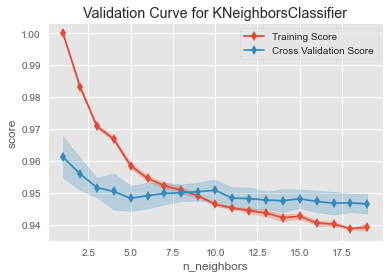

In [13]:
param_range=np.arange(1,20)
kfold = ShuffleSplit(n_splits=5)
k=ValidationCurve(KNeighborsClassifier(),param_name='n_neighbors', param_range=param_range, cv=kfold, scoring='f1_weighted',n_jobs=4)
k.fit(X_train,y_train)
k.show();

Podemos ver que a medida que aumentamos la cantidad de vecinos la precisión va bajando, aunque no baja demasiado. Por lo cual se decide tomar un **K=2**.

## Modelo

In [14]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

### Métricas

In [15]:
print(knn.score(X_test,y_test))

0.9508196721311475


Se tiene un acierto del 100\% con los datos de prueba.

In [20]:
kfold = ShuffleSplit(n_splits=5)
results = cross_val_score(knn, X_train, y_train, cv=kfold)
print("Media de puntaje en cross validation:",results.mean())


Media de puntaje en cross validation: 0.9531611754229742


In [16]:
y_train_pred=knn.predict(X_train)
y_pred=knn.predict(X_test)
y_prob=knn.predict_proba(X_test)

print('Precision para entrenamiento:',accuracy_score(y_train,y_train_pred))
print('Precision para validacion:',accuracy_score(y_test,y_pred))
print(y_prob)

Precision para entrenamiento: 0.9839629365645046
Precision para validacion: 0.9508196721311475
[[1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 ...
 [0.  0.  0.  0.5 0.  0.5]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0. ]]


Es decir que en un 95\% está acertando el modelo a la hora de predecir los datos.

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     glaciar       1.00      1.00      1.00       511
       lagos       1.00      1.00      1.00       129
       nubes       0.91      0.97      0.94       657
      sombra       0.32      0.23      0.26        79
      suelos       1.00      1.00      1.00       432
  vegetacion       0.97      0.94      0.95       998

    accuracy                           0.95      2806
   macro avg       0.86      0.86      0.86      2806
weighted avg       0.95      0.95      0.95      2806



In [38]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,10))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)


In [41]:
from sklearn.model_selection import GridSearchCV
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=kfold)
best_model = clf.fit(X_train,y_train)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [43]:
knn_best=KNeighborsClassifier(n_neighbors=1, leaf_size=1, p=1)
knn_best.fit(X_train,y_train)
y_pred=knn_best.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

     glaciar       1.00      1.00      1.00       511
       lagos       1.00      1.00      1.00       129
       nubes       0.96      0.93      0.95       657
      sombra       0.43      0.35      0.39        79
      suelos       1.00      1.00      1.00       432
  vegetacion       0.96      0.98      0.97       998

    accuracy                           0.96      2806
   macro avg       0.89      0.88      0.88      2806
weighted avg       0.96      0.96      0.96      2806



NameError: name 'confusion_matrix' is not defined

## Usando KNN para los datos completos.

In [17]:
datos_prueba = pd.read_csv("datos_juntos.csv",usecols=range(2,8))

datos_prueba


,ndgi,ndsi,ndsii,ndvi,nwi,dem
0,0.025163,-0.172305,-0.367554,0.389118,-0.681484,2062.0
1,0.027103,-0.178530,-0.395024,0.417656,-0.693781,2083.0
2,0.026979,-0.187584,-0.406421,0.428699,-0.699194,2107.0
3,0.021329,-0.196939,-0.401945,0.419676,-0.698608,2115.0
4,0.022098,-0.198519,-0.398587,0.417011,-0.697651,2129.0
...,...,...,...,...,...,...
3164520,0.051658,-0.213988,-0.440083,0.480810,-0.714421,558.0
3164521,0.042838,-0.216777,-0.388143,0.423932,-0.701830,548.0
3164522,0.030515,-0.231196,-0.376501,0.402393,-0.699508,546.0
3164523,0.010088,-0.262020,-0.332850,0.341791,-0.701202,545.0


Hay que organizar la base de datos para que quede con el mismo formato a la del test.

In [18]:
datos_prueba = datos_prueba[["ndvi","ndsi","ndgi","ndsii","nwi","dem"]]


In [19]:
datos_prueba.columns = ['NDVI','NDSI','NDGI','NDSII','NWI','DEM_5']

In [20]:
datos_prueba

,NDVI,NDSI,NDGI,NDSII,NWI,DEM_5
0,0.389118,-0.172305,0.025163,-0.367554,-0.681484,2062.0
1,0.417656,-0.178530,0.027103,-0.395024,-0.693781,2083.0
2,0.428699,-0.187584,0.026979,-0.406421,-0.699194,2107.0
3,0.419676,-0.196939,0.021329,-0.401945,-0.698608,2115.0
4,0.417011,-0.198519,0.022098,-0.398587,-0.697651,2129.0
...,...,...,...,...,...,...
3164520,0.480810,-0.213988,0.051658,-0.440083,-0.714421,558.0
3164521,0.423932,-0.216777,0.042838,-0.388143,-0.701830,548.0
3164522,0.402393,-0.231196,0.030515,-0.376501,-0.699508,546.0
3164523,0.341791,-0.262020,0.010088,-0.332850,-0.701202,545.0


In [21]:
y_datos_prueba = knn.predict(datos_prueba)


In [49]:
y_datos_prueba_2 = knn_best.predict(datos_prueba)

In [23]:
y_knn = pd.DataFrame(y_datos_prueba,columns=['categoria'])
y_knn

,categoria
0,vegetacion
1,vegetacion
2,vegetacion
3,vegetacion
4,vegetacion
...,...
3164520,vegetacion
3164521,vegetacion
3164522,vegetacion
3164523,vegetacion


In [57]:
y_knn_2 = pd.DataFrame(y_datos_prueba_2,columns=['categoria'])
y_knn_2

,categoria
0,1
1,1
2,1
3,1
4,1
...,...
3164520,1
3164521,1
3164522,1
3164523,1


In [29]:
y_knn.categoria.value_counts()

nubes         1312115
vegetacion    1251903
lagos          278869
suelos         197701
sombra          86548
glaciar         37389
Name: categoria, dtype: int64

In [51]:
y_knn_2.categoria.value_counts()

vegetacion    1335293
nubes         1202391
lagos          271739
suelos         205108
sombra         112899
glaciar         37095
Name: categoria, dtype: int64

In [54]:
y_knn['categoria'].replace(['vegetacion', 'nubes','glaciar','suelos','lagos','sombra'],[1, 2, 3, 4, 5, 6],inplace=True)


y_knn = y_knn.to_numpy()

matriz_knn = np.reshape(y_knn,(1391,2275))
matriz_knn = pd.DataFrame(matriz_knn)
matriz_knn


NameError: name 'y_knn' is not defined

In [58]:
y_knn_2 = y_knn_2.to_numpy()

matriz_knn_2 = np.reshape(y_knn_2,(1391,2275))
matriz_knn_2 = pd.DataFrame(matriz_knn_2)
matriz_knn_2


,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,1,1,1,1,1,1,1,1,1,1,...,1,6,1,1,1,1,6,6,6,1
1,1,1,1,1,1,1,1,1,1,1,...,6,1,6,6,1,6,1,6,6,6
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,6,6,1,6,1,2,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,6,1,6,2,1,1,2
4,1,1,1,1,1,1,1,1,1,1,...,6,6,1,1,1,2,1,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1387,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1388,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1389,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [59]:
matriz_knn_2.to_csv("KNN_Num.csv",header=False, index=False)

In [31]:
matriz_knn.to_csv("Prediccion_KNN_NUM.csv",header=False, index=False)

# SVM.

In [60]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [64]:
from yellowbrick.model_selection import ValidationCurve
c=np.arange(1,30)
k=ValidationCurve(svc,param_name='C', param_range=c, cv=4, scoring='f1_weighted',n_jobs=4)
k.fit(X,y)
k.show();

ModuleNotFoundError: No module named 'yellowbrick'

In [66]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=  17.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=  15.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.572 total time=  18.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time=  18.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=  18.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=  14.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.939 total time=  15.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.931 total time=  17.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=  18.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=  16.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.952 total time=   7.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

KeyboardInterrupt: 

In [72]:
svc=SVC(probability=True, kernel='linear')
svc.fit(X_train,y_train)


SVC(kernel='linear', probability=True)

In [40]:
print('Precision para entrenamiento:',accuracy_score(y_train,svc.predict(X_train)))
print('Precision para validacion:',accuracy_score(y_test,svc.predict(X_test)))

Precision para entrenamiento: 0.9578581610833927
Precision para validacion: 0.9632929436920884


In [76]:
pred_svc = svc.predict(X_test)
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

     glaciar       1.00      1.00      1.00       511
       lagos       1.00      0.99      1.00       129
       nubes       0.95      0.97      0.96       657
      sombra       0.00      0.00      0.00        79
      suelos       1.00      1.00      1.00       432
  vegetacion       0.94      0.99      0.97       998

    accuracy                           0.96      2806
   macro avg       0.81      0.83      0.82      2806
weighted avg       0.94      0.96      0.95      2806



### SVC para los datos completos.

In [79]:
y_svc = svc.predict(datos_prueba)

In [81]:
y_svc_frame = pd.DataFrame(y_svc,columns=['categoria'])
y_svc_frame

,categoria
0,vegetacion
1,vegetacion
2,vegetacion
3,vegetacion
4,vegetacion
...,...
3164520,vegetacion
3164521,vegetacion
3164522,vegetacion
3164523,vegetacion


In [82]:
y_svc_frame['categoria'].replace(['vegetacion', 'nubes','glaciar','suelos','lagos','sombra'],[1, 2, 3, 4, 5, 6],inplace=True)


y_svc_frame = y_svc_frame.to_numpy()

matriz_svc = np.reshape(y_svc_frame,(1391,2275))
matriz_svc = pd.DataFrame(matriz_svc)
matriz_svc


,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1387,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1388,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1389,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [107]:
matriz_svc.to_csv("Prediccion_SVC_NUM.csv",header=False, index=False)

# Redes neuronales.

Para este método se recomienda estandarizar las variables.

In [76]:
X_train_standardized = scaler.fit_transform(X_train)
X_train_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test_standardized = scaler.fit_transform(X_test)
X_test_standardized = pd.DataFrame(X_test_standardized, columns=X_test.columns)


X_train_standardized

,NDVI,NDSI,NDGI,NDSII,NWI,DEM_5
0,-1.267216,2.235815,0.539901,1.409002,2.166674,1.445351
1,1.321680,-0.655195,1.019187,-1.282990,-0.784381,-1.057547
2,-0.451539,-0.762334,-1.697369,0.276753,-0.722100,0.915297
3,-1.255921,2.167960,0.561462,1.399684,2.090490,1.429881
4,-0.563638,0.070727,-0.594485,0.528483,0.256368,-0.395590
...,...,...,...,...,...,...
11219,-1.286392,2.253530,0.581945,1.434271,2.187821,1.445351
11220,-0.703233,0.368228,-0.591023,0.676390,0.589913,-0.140741
11221,1.394668,-0.772401,1.236909,-1.337575,-0.873494,-1.012766
11222,-1.260561,2.154642,0.627209,1.412479,2.067539,1.326475


In [77]:
mlp = MLPClassifier(hidden_layer_sizes=(5,2),max_iter=500)
mlp.fit(X_train_standardized,y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

In [78]:
neuronal_ypred = mlp.predict(X_test_standardized)

In [79]:
print(mlp.score(X_test_standardized,y_test))

0.9925160370634355


In [103]:
print(accuracy_score(neuronal_ypred,y_test))

0.9975053456878118


In [82]:
mlp_3 = MLPClassifier(hidden_layer_sizes=(10,10,10,10),max_iter=500)
mlp_3.fit(X_train_standardized,y_train)
neuronal_ypred = mlp_3.predict(X_test_standardized)
print(mlp_3.score(X_test_standardized,y_test))

0.9960798289379901


In [104]:
mlp_4 = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=5, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
mlp_4.fit(X_train_standardized,y_train)
neuronal_ypred_2 = mlp_4.predict(X_test_standardized)
print(mlp_4.score(X_test_standardized,y_test))

0.9975053456878118


In [105]:
print(accuracy_score(neuronal_ypred_2,y_test))

0.9975053456878118


In [84]:
parameters = {'solver': ['lbfgs'], 'max_iter': [100, 200, 300, 500, 1000,1500 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

0.3582501781895937
{'alpha': 0.1, 'hidden_layer_sizes': 14, 'max_iter': 1500, 'random_state': 5, 'solver': 'lbfgs'}


In [80]:
kfold = KFold(n_splits=5)
results = cross_val_score(mlp, X_train_standardized, y_train, cv=kfold)
print(results.mean())

0.9870818892448657


Haciendo cross validation, vemos que tiene un acierto del 95\% las redes neuronales.

In [73]:

print(classification_report(y_test,neuronal_ypred))


              precision    recall  f1-score   support

     glaciar       1.00      1.00      1.00       511
       lagos       1.00      0.96      0.98       129
       nubes       1.00      0.98      0.99       657
      sombra       0.83      0.99      0.90        79
      suelos       0.99      1.00      1.00       432
  vegetacion       1.00      1.00      1.00       998

    accuracy                           0.99      2806
   macro avg       0.97      0.99      0.98      2806
weighted avg       0.99      0.99      0.99      2806



## Predicciones para la matriz completa.

In [86]:
datos_prueba

,NDVI,NDSI,NDGI,NDSII,NWI,DEM_5
0,0.389118,-0.172305,0.025163,-0.367554,-0.681484,2062.0
1,0.417656,-0.178530,0.027103,-0.395024,-0.693781,2083.0
2,0.428699,-0.187584,0.026979,-0.406421,-0.699194,2107.0
3,0.419676,-0.196939,0.021329,-0.401945,-0.698608,2115.0
4,0.417011,-0.198519,0.022098,-0.398587,-0.697651,2129.0
...,...,...,...,...,...,...
3164520,0.480810,-0.213988,0.051658,-0.440083,-0.714421,558.0
3164521,0.423932,-0.216777,0.042838,-0.388143,-0.701830,548.0
3164522,0.402393,-0.231196,0.030515,-0.376501,-0.699508,546.0
3164523,0.341791,-0.262020,0.010088,-0.332850,-0.701202,545.0


In [39]:
datos_estandarizados = scaler.fit_transform(datos_prueba)
datos_estandarizados = pd.DataFrame(datos_estandarizados, columns=datos_prueba.columns)
datos_estandarizados

,ndvi,ndsi,ndgi,ndsii,nwi,dem
0,1.375193,0.157242,1.193690,-1.366253,-0.446021,-0.835588
1,1.605427,0.085030,1.276774,-1.624575,-0.666020,-0.815339
2,1.694524,-0.020010,1.271477,-1.731744,-0.762850,-0.792197
3,1.621726,-0.128536,1.029463,-1.689657,-0.752360,-0.784483
4,1.600229,-0.146859,1.062406,-1.658074,-0.735250,-0.770983
...,...,...,...,...,...,...
3164520,2.114944,-0.326319,2.328413,-2.048294,-1.035254,-2.285832
3164521,1.656060,-0.358670,1.950669,-1.559863,-0.810008,-2.295475
3164522,1.482289,-0.525943,1.422916,-1.450384,-0.768466,-2.297403
3164523,0.993363,-0.883525,0.548060,-1.039907,-0.798776,-2.298368


In [68]:
y_neuronal = mlp.predict(datos_estandarizados)
y_neuronal

array(['vegetacion', 'vegetacion', 'vegetacion', ..., 'vegetacion',
       'vegetacion', 'vegetacion'], dtype='<U10')

In [69]:
matriz_neuronal = np.reshape(y_neuronal,(1391,2275))
matriz_neuronal = pd.DataFrame(matriz_neuronal)
matriz_neuronal

,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,...,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes
1,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,...,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes
2,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,...,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes
3,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,...,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes
4,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,...,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes,nubes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,...,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion
1387,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,...,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,sombra,vegetacion
1388,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,...,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,sombra,vegetacion,vegetacion
1389,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,...,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,vegetacion,sombra,sombra


In [71]:
y_neuronal = pd.DataFrame(y_neuronal,columns=['categoria'])
y_neuronal

,categoria
0,vegetacion
1,vegetacion
2,vegetacion
3,vegetacion
4,vegetacion
...,...
3164520,vegetacion
3164521,vegetacion
3164522,vegetacion
3164523,vegetacion


In [72]:
y_neuronal['categoria'].replace(['vegetacion', 'nubes','glaciar','suelos','lagos','sombra'],[1, 2, 3, 4, 5, 6],inplace=True)

In [75]:
y_neuronal = y_neuronal.to_numpy()

In [76]:
matriz_neuronal = np.reshape(y_neuronal,(1391,2275))
matriz_neuronal = pd.DataFrame(matriz_neuronal)
matriz_neuronal

,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1387,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,6,1
1388,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,6,1,1
1389,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,6,6


In [108]:
matriz_neuronal.to_csv("Prediccion_NEURONAL_NUM.csv",header=False, index=False)

# Análisis de discriminante.

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=2)
data_projected = LDA.fit_transform(X_train,y_train)

y_pred_LDA = LDA.predict(X_test)

In [25]:
y_pred_LDA

array(['glaciar', 'glaciar', 'vegetacion', ..., 'vegetacion', 'glaciar',
       'suelos'], dtype='<U10')

In [26]:
LDA.score(X_test,y_test)

0.9807555238774056

In [109]:
print(accuracy_score(y_pred_LDA,y_test))

0.9807555238774056


In [27]:
y_lda = LDA.predict(datos_prueba)
y_lda = pd.DataFrame(y_lda,columns=['categoria'])
y_lda


,categoria
0,vegetacion
1,vegetacion
2,vegetacion
3,vegetacion
4,vegetacion
...,...
3164520,vegetacion
3164521,vegetacion
3164522,vegetacion
3164523,vegetacion


In [28]:
print(classification_report(y_test,y_pred_LDA))

              precision    recall  f1-score   support

     glaciar       1.00      0.97      0.99       511
       lagos       0.93      0.99      0.96       129
       nubes       1.00      0.94      0.97       657
      sombra       0.70      0.99      0.82        79
      suelos       0.98      1.00      0.99       432
  vegetacion       1.00      1.00      1.00       998

    accuracy                           0.98      2806
   macro avg       0.94      0.98      0.95      2806
weighted avg       0.98      0.98      0.98      2806



In [105]:
y_lda['categoria'].replace(['vegetacion', 'nubes','glaciar','suelos','lagos','sombra'],[1, 2, 3, 4, 5, 6],inplace=True)
y_lda = y_lda.to_numpy()

matriz_lda = np.reshape(y_lda,(1391,2275))
matriz_lda = pd.DataFrame(matriz_lda)
matriz_lda


,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,6
2,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1387,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1388,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1389,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [110]:
matriz_lda.to_csv("Prediccion_LDA_NUM.csv",header=False, index=False)

In [17]:
np.unique(y_train)

array(['glaciar', 'lagos', 'nubes', 'sombra', 'suelos', 'vegetacion'],
      dtype=object)

In [21]:
markers = ['s','x','o','v','.','*']
colors = ['r','g','b','m','c','y']
fig = plt.figure(figsize=(100,100))
ax0 = fig.add_subplot(111)
for glacier,lagos,nubes,sombra,suelos,vegetacion in (np.unique(y_train),markers,colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.tight_layout();

# Arboles de decisión.

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, min_samples_leaf=10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=20)

In [86]:
print(f'El arbol de decisión tiene {dtc.tree_.node_count} nodos con una profundidad máxima de {dtc.tree_.max_depth}.')

El arbol de decisión tiene 45 nodos con una profundidad máxima de 12.


In [29]:
dtc.score(X_test,y_test)

0.9939415538132573

In [30]:
y_tree_pred = dtc.predict(X_test)

print(classification_report(y_test,y_tree_pred))

              precision    recall  f1-score   support

     glaciar       1.00      1.00      1.00       511
       lagos       1.00      1.00      1.00       129
       nubes       0.99      0.99      0.99       657
      sombra       0.90      0.89      0.89        79
      suelos       1.00      1.00      1.00       432
  vegetacion       1.00      1.00      1.00       998

    accuracy                           0.99      2806
   macro avg       0.98      0.98      0.98      2806
weighted avg       0.99      0.99      0.99      2806



In [43]:
y_tree = dtc.predict(datos_prueba)
y_tree = pd.DataFrame(y_tree,columns=['categoria'])
y_tree

,categoria
0,vegetacion
1,vegetacion
2,vegetacion
3,vegetacion
4,vegetacion
...,...
3164520,vegetacion
3164521,vegetacion
3164522,vegetacion
3164523,vegetacion


In [ ]:
y_tree['categoria'].replace(['vegetacion', 'nubes','glaciar','suelos','lagos','sombra'],[1, 2, 3, 4, 5, 6],inplace=True)


y_tree = y_tree.to_numpy()

matriz_arbol_decision_NUM = np.reshape(y_tree,(1391,2275))
matriz_arbol_decision_NUM = pd.DataFrame(matriz_arbol_decision_NUM)
matriz_arbol_decision_NUM

In [95]:
matriz_arbol_decision_NUM.to_csv("Prediccion_ARBOL_NUM.csv",header=False,index=False)

In [92]:
from sklearn.tree import export_graphviz
export_graphviz(dtc,'tree.dot',rounded=True,max_depth=5,filled=True)

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

# Random Forest.

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=3)
rf.fit(X_train, y_train)    

RandomForestClassifier(max_features=3)

In [33]:
print(rf.score(X_test,y_test))

0.9982181040627227


In [34]:

y_random = rf.predict(X_test)
print(classification_report(y_test,y_random))

              precision    recall  f1-score   support

     glaciar       1.00      1.00      1.00       511
       lagos       1.00      1.00      1.00       129
       nubes       1.00      0.99      1.00       657
      sombra       0.95      0.99      0.97        79
      suelos       1.00      1.00      1.00       432
  vegetacion       1.00      1.00      1.00       998

    accuracy                           1.00      2806
   macro avg       0.99      1.00      0.99      2806
weighted avg       1.00      1.00      1.00      2806



In [41]:
y_random = rf.predict(datos_prueba)
y_random = pd.DataFrame(y_random,columns=['categoria'])
y_random


,categoria
0,vegetacion
1,vegetacion
2,vegetacion
3,vegetacion
4,vegetacion
...,...
3164520,vegetacion
3164521,vegetacion
3164522,vegetacion
3164523,vegetacion


In [ ]:
y_random['categoria'].replace(['vegetacion', 'nubes','glaciar','suelos','lagos','sombra'],[1, 2, 3, 4, 5, 6],inplace=True)


y_random = y_random.to_numpy()

matriz_random = np.reshape(y_random,(1391,2275))
matriz_random = pd.DataFrame(matriz_random)
matriz_random


matriz_random.to_csv("Prediccion_RANDOM_NUM.csv",header=False,index=False)

# Comparación entre los modelos con los datos completos.

## Modelo KNN y Redes neuronales.

In [ ]:
accuracy_score(y_knn,y_mlpc)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [47]:
accuracy_score(y_tree,y_random)

0.9085818566767524

Es decir que KNN y red neuronal tienen una respuesta igual en un 37\%

## Modelo SVM y KNN

In [95]:
accuracy_score(y_svc_frame,y_knn)

0.9406277403401775

Es decir que las predicciones entre los modelos SVC y KNN concuerdan en un 94\% de las veces.

## Modelo SVC y Redes neuronales.

In [96]:
accuracy_score(y_svc_frame,y_neuronal)

0.3858493770787085

## Modelo SVC y LDA

In [111]:
accuracy_score(y_svc_frame,y_lda)

0.5756690182570844

## Modelo LDA y KNN

In [113]:
accuracy_score(y_knn,y_lda)

0.0

## Modelo LDA y Redes neuronales

In [114]:
accuracy_score(y_neuronal,y_lda)

0.49269416421105855

# Matrices finales.

In [89]:
matriz_svc

,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1387,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1388,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1389,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [90]:
matriz_knn

,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,1,1,1,1,1,1,1,1,1,1,...,1,6,1,1,1,1,6,6,6,1
1,1,1,1,6,1,1,1,1,1,1,...,6,1,6,6,1,6,1,6,2,2
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,6,6,1,2,1,2,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,6,1,2,2,1,1,2
4,1,1,1,1,1,1,1,1,1,1,...,6,6,6,1,1,2,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1387,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1388,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1389,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [91]:
matriz_neuronal

,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1387,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,6,1
1388,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,6,1,1
1389,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,6,6


In [115]:
matriz_lda

,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,6
2,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1387,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1388,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1389,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [135]:
matriz_arbol_decision_NUM

,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1387,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1388,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1389,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [136]:
matriz_random

,0,1,2,3,4,5,6,7,8,9,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274
0,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1387,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1388,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1389,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Seleccion de variables con Variance Threshold Feature Selection.

### Con los datos sin estándarizar

In [46]:


from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.25)
selector.fit(X_train_standardized)
print(selector.get_support())
X_train_standardized.columns[selector.get_support()]



     


[ True  True  True  True  True  True]


Index(['NDVI', 'NDSI', 'NDGI', 'NDSII', 'NWI', 'DEM_5'], dtype='object')

### Con los datos estándarizados

In [107]:
selector = VarianceThreshold(threshold=0.25)
selector.fit(X_train)
print(selector.get_support())
X_train.columns[selector.get_support()]


NameError: name 'VarianceThreshold' is not defined

### Ploter

In [ ]:
LDA=np.loadtxt('/content/drive/My Drive/ML/LDA.txt', skiprows=6)
LDA=np.where(LDA==-9999.,np.nan,LDA)
plt.imshow(LDA)
plt.colorbar();


In [ ]:
KNN3=np.loadtxt('/content/drive/My Drive/ML/KNN3.txt', skiprows=6)
KNN3=np.where(KNN3==-9999.,np.nan,KNN3)
plt.imshow(KNN3)
plt.colorbar();

In [ ]:
KNN=np.loadtxt('/content/drive/My Drive/ML/KNN.txt', skiprows=6)
KNN=np.where(KNN==-9999.,np.nan,KNN)
plt.imshow(KNN)
plt.colorbar();

In [ ]:
SVM=np.loadtxt('/content/drive/My Drive/ML/SVM2.txt', skiprows=6)
SVM=np.where(SVM==-9999.,np.nan,SVM)
plt.imshow(SVM)
plt.colorbar();

In [ ]:
ANN2=np.loadtxt('/content/drive/My Drive/ML/ANN2.txt', skiprows=6)
ANN2=np.where(ANN2==-9999.,np.nan,ANN2)
plt.imshow(ANN2)
plt.colorbar();

In [ ]:
DT=np.loadtxt('/content/drive/My Drive/ML/DT.txt', skiprows=6)
DT=np.where(DT==-9999.,np.nan,DT)
plt.imshow(DT)
plt.colorbar();

In [ ]:
RF=np.loadtxt('/content/drive/My Drive/ML/RF.txt', skiprows=6)
RF=np.where(RF==-9999.,np.nan,RF)
plt.imshow(RF)
plt.colorbar();